In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

In [4]:
data = np.array(data)
data.shape

(42000, 785)

In [5]:
# split the data
np.random.shuffle(data)

m, n = data.shape

X, y = data[:, 1:], data[:, 0]

X_hold = X[:1000].T
X_hold = X_hold / 255.
y_hold = y[:1000]

X_train = X[1000:].T
X_train = X_train / 255.
y_train = y[1000:]

X_train.shape, y_train.shape, X_hold.shape, y_hold.shape

((784, 41000), (41000,), (784, 1000), (1000,))

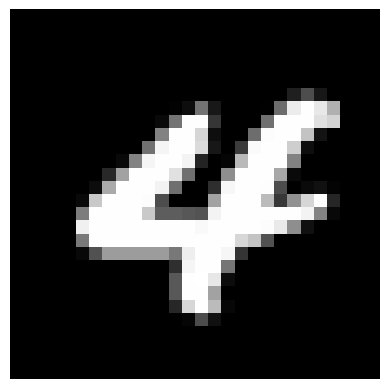

In [6]:
plt.axis("off")
plt.imshow(X_train[:, 0].reshape((28, 28)), cmap="gray");

In [25]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(8, 10) - 0.5
  b2 = np.random.rand(8, 1) - 0.5
  W3 = np.random.rand(10, 8) - 0.5
  b3 = np.random.rand(10, 1) - 0.5

  return W1, b1, W2, b2, W3, b3

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, W3, b3, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = ReLU(Z2)
  Z3 = W3.dot(A2) + b3
  A3 = softmax(Z3)

  return Z1, A1, Z2, A2, Z3, A3

def one_hot_encoder(y):
  Y = np.zeros((y.size, y.max() + 1))
  Y[np.arange(y.size), y] = 1

  return Y.T

def derivative_relu(Z):
  return Z > 0

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W3, W2, X, y):
  Y = one_hot_encoder(y)
  dZ3 = A3 - Y
  dW3 = 1 / m * dZ3.dot(A2.T)
  db3 = 1 / m * np.sum(dZ3)

  dZ2 = derivative_relu(Z2) * W3.T.dot(dZ3)
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)

  dZ1 = derivative_relu(Z1) * W2.T.dot(dZ2)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)

  return dW1, db1, dW2, db2, dW3, db3

W1, b1, W2, b2, W3, b3 = init_params()
Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_train)

print(backward_prop(Z1, A1, Z2, A2, Z3, A3, W3, W2, X_train, y_train))

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 0.04024666785093964, array([[ 3.20441742e-02,  4.93285951e-01,  3.58451663e-02,
         1.76550428e-01,  4.35771432e-02, -2.13181998e-02,
         1.26161967e-01,  6.67344743e-02,  3.92081276e-01,
         2.41012994e-02],
       [ 7.68768160e-04,  1.68303158e-03,  1.70975382e-03,
         5.08110658e-05,  2.82342384e-03,  4.13789111e-04,
        -1.17917955e-04, -4.25690086e-05,  1.57880707e-02,
         3.21818950e-04],
       [-2.31419439e-02, -4.60411622e-02, -1.87781324e-02,
        -4.59698703e-02, -4.38025814e-03,  6.27427680e-03,
        -6.60941558e-03, -2.23558988e-03, -4.97413865e-02,
        -2.74068996e-03],
       [ 4.22514643e-02,  6.57252106e-02,  8.92904691e-02,
         1.06813984e-01,  8.36541866e-03, -8.60825972e-04,
         